# Setting Up Setup

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Forest_Fire/'
%ls

/content/drive/MyDrive/Forest_Fire
Data/  ForestFire.ipynb  lr_model.pkl  sgd_model.pkl


# Importing Libraries

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
% matplotlib inline

# Importing Dataset

In [4]:
df = pd.read_csv('Data/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Data exploration

In [5]:
df.shape

(517, 13)

In [6]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [7]:
# Checking for null values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

                X           Y        FFMC  ...        wind        rain         area
count  517.000000  517.000000  517.000000  ...  517.000000  517.000000   517.000000
mean     4.669246    4.299807   90.644681  ...    4.017602    0.021663    12.847292
std      2.313778    1.229900    5.520111  ...    1.791653    0.295959    63.655818
min      1.000000    2.000000   18.700000  ...    0.400000    0.000000     0.000000
25%      3.000000    4.000000   90.200000  ...    2.700000    0.000000     0.000000
50%      4.000000    4.000000   91.600000  ...    4.000000    0.000000     0.520000
75%      7.000000    5.000000   92.900000  ...    4.900000    0.000000     6.570000
max      9.000000    9.000000   96.200000  ...    9.400000    6.400000  1090.840000

[8 rows x 11 columns]


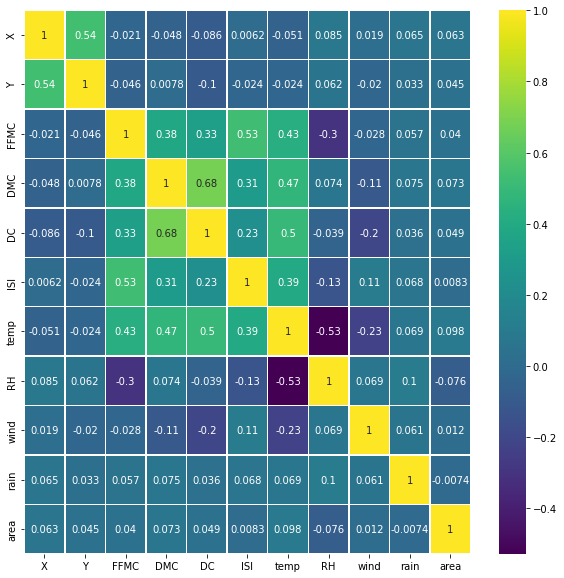

In [8]:
print(df.describe())
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis',linewidths=.5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d3391850>,
      dtype=object)

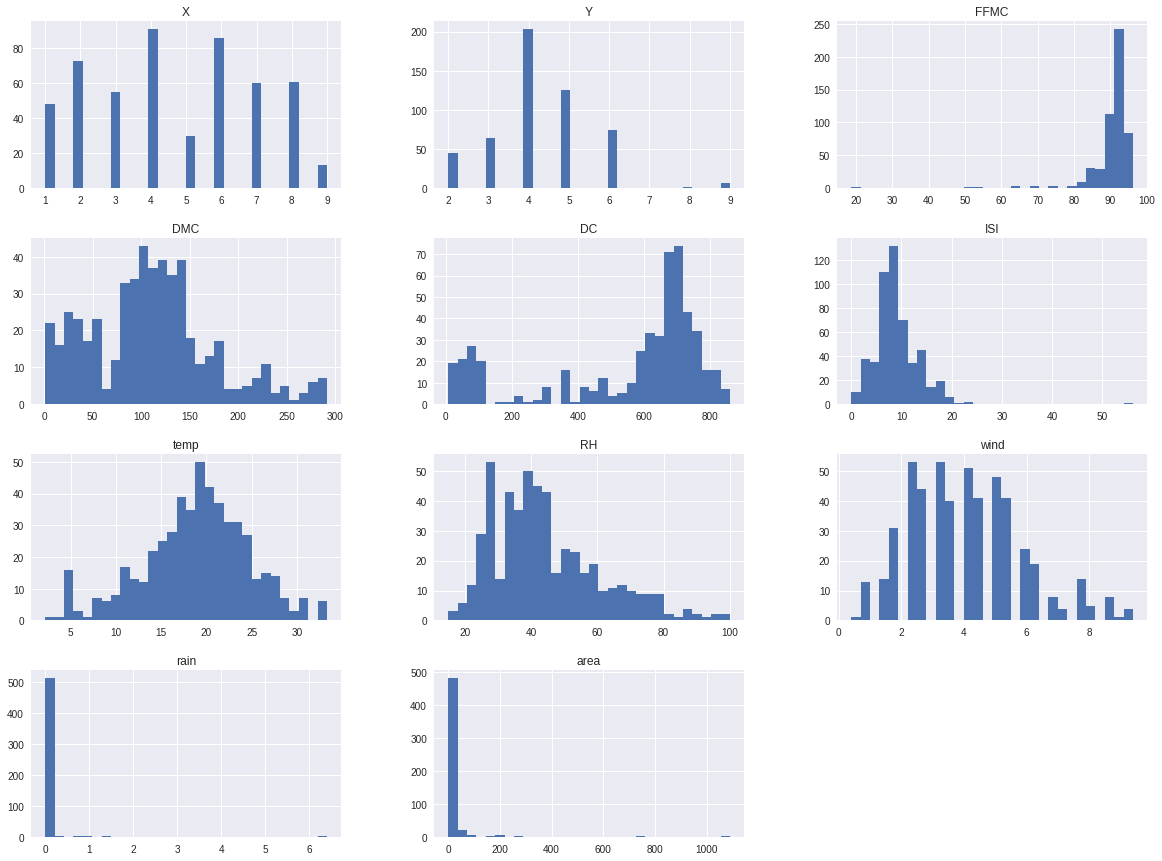

In [10]:
# used to check distribution of data
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

dupl_set = train_set.copy()

# Visualize the data

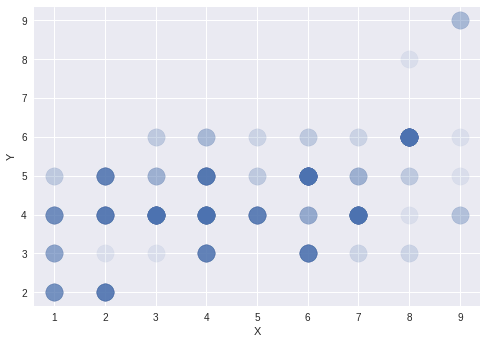

In [12]:
dupl_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300)

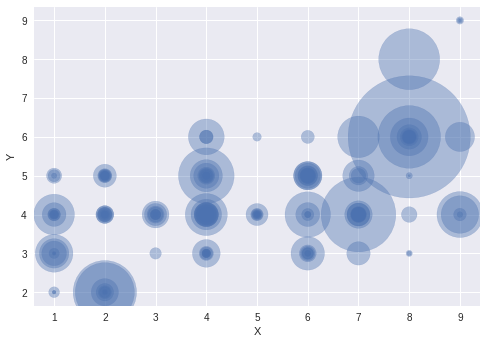

In [13]:
dupl_set.plot(kind='scatter', x='X', y='Y', alpha=0.4, s=20*dupl_set['area'])

In [14]:
# correlation
corr = dupl_set.corr()
corr['area'].sort_values(ascending=False)

area    1.000000
DMC     0.115296
temp    0.100529
X       0.097316
Y       0.064545
FFMC    0.048985
DC      0.048709
ISI     0.037799
wind    0.012684
rain   -0.005113
RH     -0.057473
Name: area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42cfd0c950>,
      dtype=object)

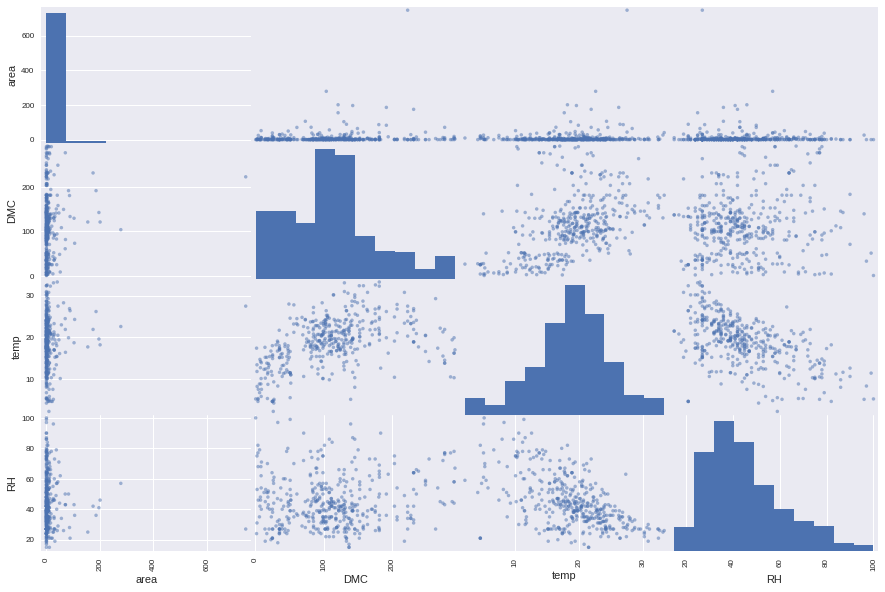

In [15]:
from pandas.plotting import scatter_matrix
attr = ['area', 'DMC', 'temp', 'RH']
scatter_matrix(dupl_set[attr], figsize=(15, 10))

In [16]:
data = dupl_set.drop('area', axis=1)
data_labels = dupl_set['area'].copy()

# Handling Text and Categorical Attributes

In [17]:
data['month'].unique()

array(['sep', 'aug', 'feb', 'mar', 'oct', 'apr', 'dec', 'jul', 'jun',
       'jan', 'may', 'nov'], dtype=object)

In [18]:
data['day'].unique()

array(['sat', 'mon', 'tue', 'sun', 'fri', 'thu', 'wed'], dtype=object)

In [19]:
# One Hot encoding

from sklearn.preprocessing import LabelBinarizer

month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = data['month']
days = data['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)

In [20]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = data.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [21]:
scaled_features

array([[-2.88472000e-01, -1.09485913e+00,  2.80285578e-01, ...,
        -1.05941934e+00,  1.63124094e-03, -6.78170911e-02],
       [-2.88472000e-01, -2.66696454e-01,  6.16522396e-02, ...,
        -3.35214892e-01, -1.00892252e+00, -6.78170911e-02],
       [-1.16128472e+00,  5.61466218e-01,  2.63467629e-01, ...,
         1.47588074e-01,  1.63124094e-03, -6.78170911e-02],
       ...,
       [-1.16128472e+00, -1.92302180e+00,  2.63467629e-01, ...,
         6.90741409e-01, -5.03645641e-01, -6.78170911e-02],
       [-1.16128472e+00,  5.61466218e-01,  4.48342905e-02, ...,
         3.88989556e-01, -1.23349003e+00, -6.78170911e-02],
       [-1.16128472e+00, -2.66696454e-01,  7.17552255e-01, ...,
        -2.74864521e-01,  1.63124094e-03, -6.78170911e-02]])

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [24]:
from sklearn.pipeline import Pipeline
import numpy as np

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((data['month'].unique(), data['day'].unique()), axis=0)

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])


In [25]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [26]:
data_prepared = full_pipeline.fit_transform(data)

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(data_prepared, data_labels)

LinearRegression()

In [28]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_predictions = lr_model.predict(some_data_prepared)

In [29]:
print(some_predictions)
print(list(some_labels))

[18.95308067 17.52143095  1.8387682  19.12084738  6.85086008]
[3.33, 3.07, 3.09, 14.68, 6.38]


In [30]:
from sklearn.metrics import mean_squared_error
data_predictions = lr_model.predict(data_prepared)
lr_mse = mean_squared_error(data_labels, data_predictions)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)

44.45327410460617


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

d_model = DecisionTreeRegressor()
d_model.fit(data_prepared, data_labels)

DecisionTreeRegressor()

In [32]:
data_predictions = d_model.predict(data_prepared)
d_mse = mean_squared_error(data_labels, data_predictions)
d_rmse = np.sqrt(d_mse)
print(d_rmse)

0.6246162986835309


In [33]:
from sklearn.model_selection import cross_val_score

d_scores = cross_val_score(d_model, data_prepared, data_labels,
                         scoring='neg_mean_squared_error', cv=10)

d_rmse_scores = np.sqrt(-d_scores)

lr_scores = cross_val_score(lr_model, data_prepared, data_labels,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

In [34]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(d_rmse_scores)
display_scores(lr_rmse_scores)

Scores:  [ 22.39678213 128.45773644 121.88153708  32.60074195  81.11382309
  39.36949909  55.60681345 119.37343112  44.95224439  56.997311  ]
Mean:  70.27499197411176
Standard Deviation:  37.78375264492447
Scores:  [ 16.79396157  54.45474309  20.60609778  16.93858408  41.23049924
  21.97246638  20.03594328 119.15641167  16.23465441  33.28695881]
Mean:  36.07103203205487
Standard Deviation:  30.169037125172274


# SGD Regressor

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(data_prepared, data_labels)
sgd_scores = cross_val_score(sgd_model, data_prepared, data_labels,
                         scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)

display_scores(sgd_rmse_scores)

Scores:  [ 16.6625602   54.55277055  19.68414111  16.37407518  35.51859901
  21.5087766   19.75113726 119.10821086  14.22459254  32.7366187 ]
Mean:  35.01214820157001
Standard Deviation:  30.374023640111133


In [36]:
import pickle
# file = open('sgd_model.pkl', 'wb')
# pickle.dump(sgd_model, file)

In [37]:
model = open('model/sgd_mpdel.pkl','rb')
forest = pickle.load(model)